### Introducción

Últimamente he gastado mucho tiempo en redes sociales y particularmente cuando veo una noticia relacionada con las vacunas en mi país (Colombia), frecuento ver una cantidad inusitada de personas comentando la incapacidad de las vacunas de frenar el virus Covid-19 o peor aún diciendo que las personas que están falleciendo son a causa de las mismas vacunas.

Como persona que se guía más por lo que los datos y la evidencia real dice, trataré de hacer un breve análisis si las hipótesis de las personas tienen un fundamento real o no y tratar incluso de refutar dicha hipótesis por lo peligroso que puede ser que dichos rumores se difundan entre la sociedad.

### Desarrollo

Todo el código para desarrollar el modelo será elaborado en Python 3 e inicialmente realizaremos una exploración muy breve de los datos. Dejaremos una celda para la importación de las librerías, y posteriormente procederemos con la importación del dataset y el desarrollo del problema.

### Importación de las librerías

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
%matplotlib inline

### Lectura del dataset

In [2]:
df = pd.read_csv('owid-covid-data.csv')

### Análisis 

En primer lugar, haré una breve exploración de los datos que fueron descargados del sitio de datos abiertos: https://ourworldindata.org/ donde se encuentra no sólo información de Covid sino de todo tipo de datasets para uso público

In [14]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [6]:
df.dtypes

iso_code                       object
continent                      object
location                       object
date                           object
total_cases                   float64
                               ...   
handwashing_facilities        float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
excess_mortality              float64
Length: 62, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

Inicialmente analizaremos sólo Colombia con el objetivo de ver si hay una relación entre el esquema de vacunación y el descenso de muertes y casos nuevos de Covid-19

In [5]:
df_colombia = df[(df['iso_code'] == 'COL')]

Text(0, 0.5, 'Nuevos casos')

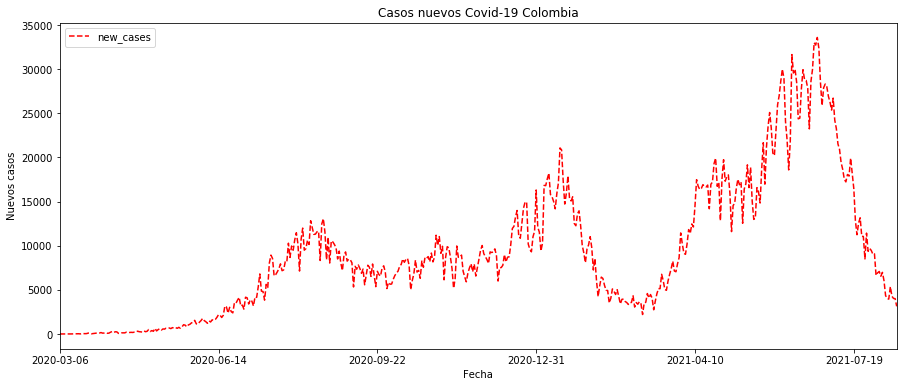

In [11]:
df_colombia.plot(x='date',title = 'Casos nuevos Covid-19 Colombia', y='new_cases',figsize=(15,6),linestyle='--', markerfacecolor='r',color='r',markersize=10)

plt.xlabel('Fecha')
plt.ylabel('Nuevos casos')

Text(0, 0.5, 'Muertes')

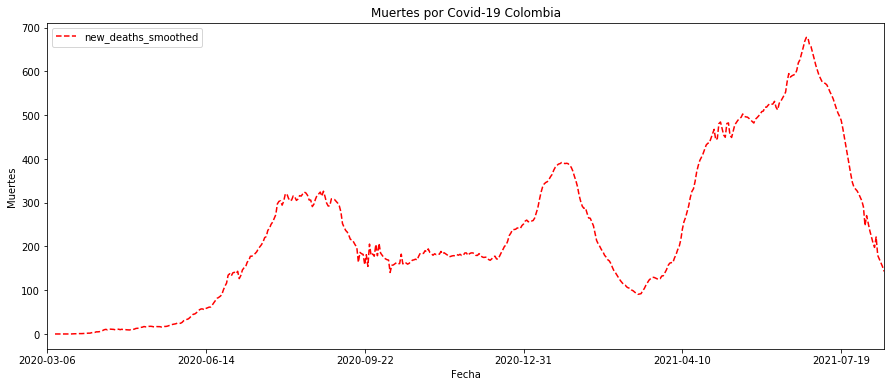

In [13]:
df_colombia.plot(x='date',title = 'Muertes por Covid-19 Colombia', y='new_deaths_smoothed',figsize=(15,6),linestyle='--', markerfacecolor='r',color='r',markersize=10)

plt.xlabel('Fecha')
plt.ylabel('Muertes')

A simple vista se puede sacar una conclusión muy obvia y es que mientras más casos nuevos hayan mayor será el número de muertes (Sí, súper obvio). Prácticamente son la misma gráfica si la miramos de forma escueta. Adicionalmente se visualiza un descenso estrepitoso y sostenido tanto de casos nuevos como de muertes desde finales de junio.

### Vacunas Vs Covid

Ahora me enfocaré en las fechas en que las vacunas han iniciado en el país

In [44]:
df_colombia_vaccinated = df_colombia[(df_colombia['date'] >= '2021-05-01')]

In [45]:
df_colombia_vaccinated['people_fully_vaccinated'].corr(df_colombia_vaccinated['new_deaths_smoothed'])

-0.6295796775893491

In [52]:
df_colombia_vaccinated = df_colombia_vaccinated.fillna(method='ffill')

Text(0, 0.5, 'Personas completamente vacunadas')

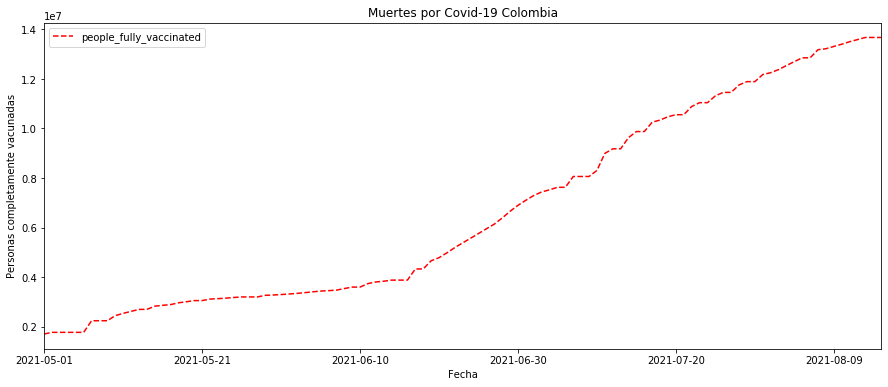

In [53]:
df_colombia_vaccinated.plot(x='date',title = 'Muertes por Covid-19 Colombia', y='people_fully_vaccinated',figsize=(15,6),linestyle='--', markerfacecolor='r',color='r',markersize=10)

plt.xlabel('Fecha')
plt.ylabel('Personas completamente vacunadas')

Text(0, 0.5, 'Muertes')

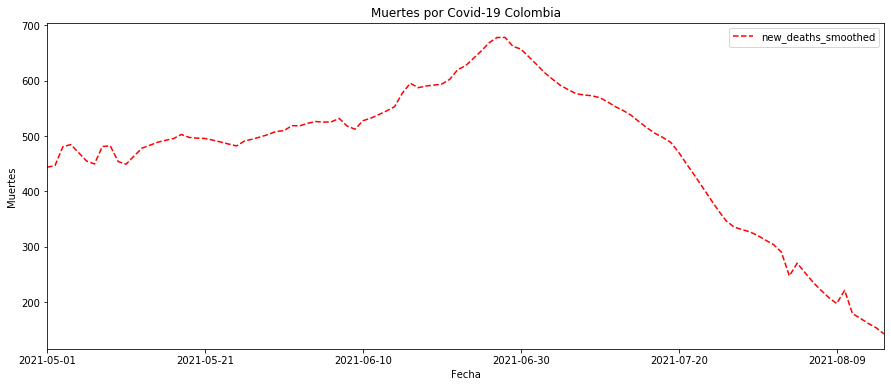

In [49]:
df_colombia_vaccinated.plot(x='date',title = 'Muertes por Covid-19 Colombia', y='new_deaths_smoothed',figsize=(15,6),linestyle='--', markerfacecolor='r',color='r',markersize=10)

plt.xlabel('Fecha')
plt.ylabel('Muertes')

### Autor

Andrés Grisales Ardila